In [1]:
# Import necessary libraries
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import wave
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf

In [2]:
# Define constants
FILENAME = "D:/project/Marathwada Voice/3.wav"
FOLDER_PATH1 = "D:/project/Marathwada Voice"
FOLDER_PATH2 = "D:/project/Vidharbha Voice"

In [3]:
# Load audio file
data, sample_rate = librosa.load(FILENAME)

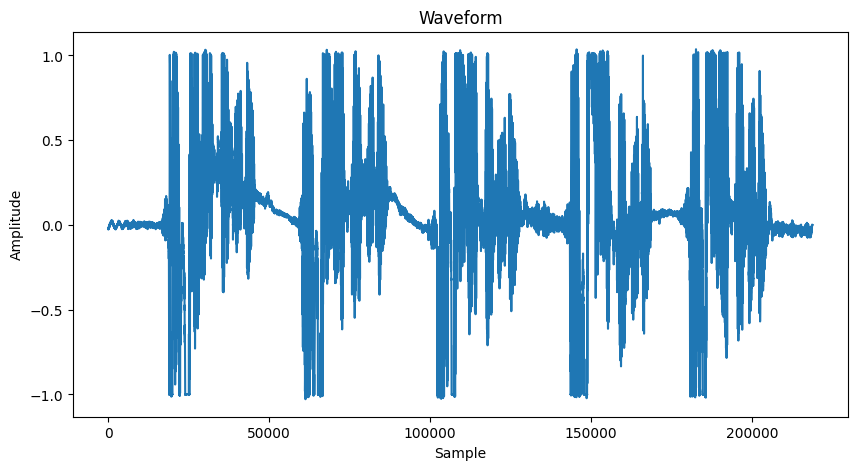

In [4]:
# Plot waveform
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

In [5]:
# Define functions
def list_wav_files_in_folder(folder_path):
    wav_files = [file for file in os.listdir(folder_path) if file.endswith(".wav")]
    for wav_file in wav_files:
        print(wav_file)

In [6]:
def read_sample_rate(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        return wav_file.getframerate()

In [7]:
def list_wav_files_and_sample_rates(folder_path, label):
    wav_files = [file for file in os.listdir(folder_path) if file.endswith(".wav")]
    for wav_file in wav_files:
        file_path = os.path.join(folder_path, wav_file)
        sample_rate = read_sample_rate(file_path)
        print(f"Folder: {label}, File: {wav_file}, Sample Rate: {sample_rate} Hz")

In [8]:
def count_wav_files_in_folder(folder_path):
    wav_files = [file for file in os.listdir(folder_path) if file.endswith(".wav")]
    return len(wav_files)

In [9]:
def extract_mfcc_features(audio_data, sample_rate, n_mfcc=15):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)
    return mfccs

In [10]:
def read_and_process_wav_files(folder_path):
    features_list = []
    labels = []
    wav_files = [file for file in os.listdir(folder_path) if file.endswith(".wav")]
    for wav_file in wav_files:
        file_path = os.path.join(folder_path, wav_file)
        audio_data, sample_rate = librosa.load(file_path, sr=None)  
        mfccs = extract_mfcc_features(audio_data, sample_rate)
        features_list.append(mfccs.T)  
        labels.append(folder_path.split('/')[-1])  
    return features_list, labels

In [11]:
# List WAV files in folders
print("WAV files in Marathwada Voice folder:")
list_wav_files_in_folder(FOLDER_PATH1)

WAV files in Marathwada Voice folder:
2.wav
3.wav
4.wav
5.wav
m1-converted.wav
m10-converted.wav
m11-converted.wav
m12-converted.wav
m13-converted.wav
m14-converted.wav
m15-converted.wav
m16-converted.wav
m17-converted.wav
m19-converted.wav
m2-converted.wav
m20-converted.wav
m21-converted.wav
m22-converted.wav
m23-converted.wav
m3-converted.wav
m4-converted.wav
m5-converted.wav
m6-converted.wav
m8-converted.wav
m9-converted.wav


In [12]:
print("\nWAV files in Vidharbha Voice folder:")
list_wav_files_in_folder(FOLDER_PATH2)


WAV files in Vidharbha Voice folder:
1 (1).wav
2 (1).wav
3 (1).wav
4 (1).wav
5 (1).wav
v23-converted.wav
v24-converted.wav
v25-converted.wav
v26-converted.wav
v27-converted.wav
v28-converted.wav
v29-converted.wav
v30-converted.wav
v31-converted.wav
v32-converted.wav
v33-converted.wav
v34-converted.wav
v35-converted.wav
v36-converted.wav
v37-converted.wav
v38-converted.wav
v39-converted.wav
v40-converted.wav


In [13]:
# List WAV files and sample rates in folders
print("Sample rates for WAV files in Marathwada Voice folder:")
list_wav_files_and_sample_rates(FOLDER_PATH1, "Marathwada Voice")

Sample rates for WAV files in Marathwada Voice folder:
Folder: Marathwada Voice, File: 2.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: 3.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: 4.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: 5.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m1-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m10-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m11-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m12-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m13-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m14-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m15-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m16-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m17-converted.wav, Sample Rate: 8000 Hz
Folder: Marathwada Voice, File: m19-converted.wav, Sample 

In [14]:
print("\nSample rates for WAV files in Vidharbha Voice folder:")
list_wav_files_and_sample_rates(FOLDER_PATH2, "Vidharbha Voice")


Sample rates for WAV files in Vidharbha Voice folder:
Folder: Vidharbha Voice, File: 1 (1).wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: 2 (1).wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: 3 (1).wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: 4 (1).wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: 5 (1).wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v23-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v24-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v25-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v26-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v27-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v28-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v29-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v30-converted.wav, Sample Rate: 8000 Hz
Folder: Vidharbha Voice, File: v31-converted.wav, Sample Rate:

In [15]:
# Count WAV files in folders
count_marathwada_voice = count_wav_files_in_folder(FOLDER_PATH1)
count_vidharbha_voice = count_wav_files_in_folder(FOLDER_PATH2)

In [16]:
print("Number of WAV files in Marathwada Voice folder:", count_marathwada_voice)
print("Number of WAV files in Vidharbha Voice folder:", count_vidharbha_voice)

Number of WAV files in Marathwada Voice folder: 25
Number of WAV files in Vidharbha Voice folder: 23


In [17]:
# Check for imbalance
if count_marathwada_voice > count_vidharbha_voice:
    imbalance_ratio = count_marathwada_voice / count_vidharbha_voice
    print("The dataset is imbalanced. Marathwada Voice has", imbalance_ratio, "times more samples than Vidharbha Voice.")
elif count_vidharbha_voice > count_marathwada_voice:
    imbalance_ratio = count_vidharbha_voice / count_marathwada_voice
    print("The dataset is imbalanced. Vidharbha Voice has", imbalance_ratio, "times more samples than Marathwada Voice.")
else:
    print("The dataset is balanced.")

The dataset is imbalanced. Marathwada Voice has 1.0869565217391304 times more samples than Vidharbha Voice.


In [18]:
# Extract MFCC features
marathwada_voice_features, marathwada_voice_labels = read_and_process_wav_files(FOLDER_PATH1)
vidharbha_voice_features, vidharbha_voice_labels = read_and_process_wav_files(FOLDER_PATH2)

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Import necessary libraries and functions

In [20]:
# Convert lists to numpy arrays
marathwada_voice_features = np.array(marathwada_voice_features)
vidharbha_voice_features = np.array(vidharbha_voice_features)

C:\Users\pjmod\AppData\Local\Temp\ipykernel_19212\3849400332.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  marathwada_voice_features = np.array(marathwada_voice_features)
C:\Users\pjmod\AppData\Local\Temp\ipykernel_19212\3849400332.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vidharbha_voice_features = np.array(vidharbha_voice_features)


In [21]:
# Create labels for the classes
marathwada_voice_labels = np.array([0] * len(marathwada_voice_labels))
vidharbha_voice_labels = np.array([1] * len(vidharbha_voice_labels))

In [22]:
# Combine features and labels for both classes
all_features = np.concatenate((marathwada_voice_features, vidharbha_voice_features))
all_labels = np.concatenate((marathwada_voice_labels, vidharbha_voice_labels))

In [23]:
# Find the maximum length of MFCC features
max_length = max(len(x) for x in all_features)

In [24]:
# Pad or truncate MFCC features to the maximum length
all_features_padded = np.array([np.pad(x, ((0, max_length - len(x)), (0, 0))) if len(x) < max_length else x[:max_length] for x in all_features])

In [25]:
# Flatten the padded/truncated MFCC features
all_features_flat = all_features_padded.reshape(all_features_padded.shape[0], -1)

In [26]:
# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
all_features_resampled, all_labels_resampled = ros.fit_resample(all_features_flat, all_labels)

# Print out some random samples
print("Random samples from the resampled dataset:")
random_indices = np.random.choice(len(all_labels_resampled), size=5, replace=False)
for idx in random_indices:
    print("Features:", all_features_resampled[idx])
    print("Label:", all_labels_resampled[idx])
    print()


Random samples from the resampled dataset:
Features: [-271.50916    61.469772  -15.310942 ...    0.          0.
    0.      ]
Label: 1

Features: [-336.11792    90.39346    12.499976 ...    0.          0.
    0.      ]
Label: 1

Features: [-270.82953    67.733215   18.535614 ...    0.          0.
    0.      ]
Label: 0

Features: [-253.90506    65.246185   -6.028385 ...    0.          0.
    0.      ]
Label: 1

Features: [-309.96106     86.088745     0.8001008 ...    0.           0.
    0.       ]
Label: 0



In [27]:
# Reshape the features back to the original shape
all_features_resampled = all_features_resampled.reshape(all_features_resampled.shape[0], -1, all_features_padded.shape[2])

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features_resampled, all_labels_resampled, test_size=0.3, random_state=42)

In [29]:

# Adjust the model's input layer to expect the new input shape
model = Sequential([
    Flatten(input_shape=(275, 15)),  # Assuming the input shape is (275, 15)
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\pjmod\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4167 - loss: 39.4201 - val_accuracy: 0.8182 - val_loss: 17.4709
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6667 - loss: 19.5513 - val_accuracy: 0.8182 - val_loss: 3.1338
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8333 - loss: 13.3350 - val_accuracy: 0.6364 - val_loss: 9.3703
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8333 - loss: 24.1828 - val_accuracy: 0.6364 - val_loss: 17.9935
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.6250 - loss: 23.8516 - val_accuracy: 0.9091 - val_loss: 0.2306
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7500 - loss: 13.1218 - val_accuracy: 0.9091 - val_loss: 0.7147
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7500 - loss: 16.6752 - val_accuracy: 0.8182 - val_loss: 11.6853
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8750 - loss: 33.6132 - val_accuracy: 0.8182 - v

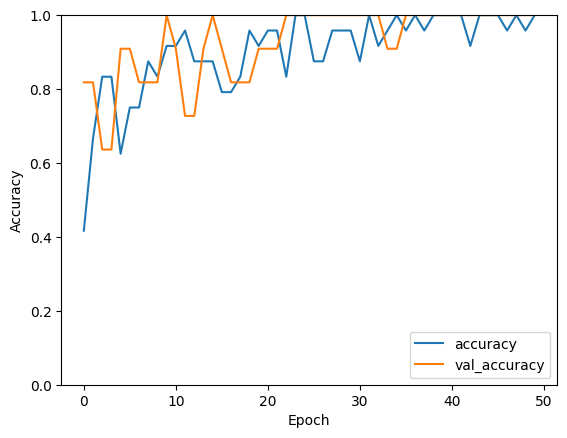

In [31]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [32]:
# Import necessary libraries
from sklearn.metrics import classification_report

train_accuracy = history.history['accuracy'][-1]

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Print training accuracy
print('Train accuracy:', train_accuracy)

# Make predictions
predictions = model.predict(X_test)
# Convert probabilities to classes
predicted_classes = np.round(predictions).flatten()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6667 - loss: 42.6097
Test accuracy: 0.6666666865348816
Train accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       1.00      0.38      0.55         8

    accuracy                           0.67        15
   macro avg       0.79      0.69      0.64        15
weighted avg       0.81      0.67      0.63        15



In [33]:
# Import necessary libraries
from tensorflow.keras.models import load_model

# Save the trained model
model.save("voice_classification_model.h5")

# Later, you can load the model using:
# loaded_model = load_model("voice_classification_model.h5")
